# Unsupervised Training on untransposed, unsampled dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('../modules')
from music_project import Analyzer

## Clustering and Manifold Learning

### Load Data

In [6]:
csv_dir = '../csv/hymns_single-tone_notranspositions_nosampling.csv'
df_nosamp = pd.read_csv(csv_dir, index_col=0)
X = df_nosamp[[str(n) for n in range(11)]]
y = df_nosamp['sig-mode']
ana_nosamp = Analyzer(X, y)
ana_nosamp.train_test_split(test_size=0.2, random_state=42)
df_nosamp

,sig-mode,mode,sig,name,0,1,2,3,4,5,6,7,8,9,10,11
0,17,1,8,MajesticSweetnessSitsEnthroned_(nc)simms-jr.mid,0.156354,0.077541,0.000000,0.245839,0.000000,0.023497,0.000000,0.038770,0.401606,0.000000,0.056393,0.000000
1,17,1,8,MakeMeAChannelOfBlessing_(nc)simms-jr.mid,0.112117,0.152700,0.011005,0.183308,0.000000,0.055715,0.000000,0.061905,0.293248,0.000000,0.130001,0.000000
2,21,1,10,ManOfSorrows_(nc)simms-jr.mid,0.050256,0.000000,0.192911,0.068771,0.007935,0.184976,0.013225,0.100511,0.000000,0.053782,0.327632,0.000000
3,7,1,3,MayTheMindOfChristMySavior_(nc)simms-jr.mid,0.072600,0.000000,0.052693,0.247073,0.000000,0.118267,0.000000,0.141816,0.124122,0.000000,0.243430,0.000000
4,11,1,5,MomentByMoment_(nc)simms-jr.mid,0.220338,0.007861,0.074174,0.015723,0.054011,0.302664,0.007206,0.116756,0.006551,0.104819,0.074829,0.015068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,0,0,0,Havah_Nagilah_(nc)pope.mid,0.062154,0.000000,0.118769,0.001231,0.326462,0.100308,0.004923,0.008615,0.052615,0.211692,0.014769,0.098462
358,21,1,10,America_the_Beautiful_(nc)pope.mid,0.161224,0.000000,0.116327,0.075510,0.012245,0.220408,0.000000,0.073469,0.008163,0.095918,0.228571,0.008163
359,21,1,10,Battle_Hymn_of_the_Republic_(nc)pope.mid,0.035992,0.000000,0.185798,0.090467,0.000000,0.214981,0.000000,0.042802,0.000000,0.016537,0.413424,0.000000
360,11,1,5,My_Country_Tis_of_Thee_(nc)pope.mid,0.299383,0.000000,0.049383,0.000000,0.043210,0.250000,0.000000,0.101852,0.000000,0.160494,0.095679,0.000000


### K-means Clustering

In [7]:
ana_nosamp.fit_kmeans(name='kmeans', random_state=42)

C:\Users\radun\anaconda3\envs\music\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\radun\anaconda3\envs\music\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Best clustering: KMeans(n_clusters=13, n_init=1, random_state=42)
Info score for cluster: 0.878512003937509


### Gaussian Mixture Model

In [8]:
ana_nosamp.fit_gmm(name='gmm', random_state=42)

C:\Users\radun\anaconda3\envs\music\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Best clustering: GaussianMixture(n_components=13, random_state=42)
Info score for cluster: 0.8798431273139702


### DBSCAN

In [9]:
eps_vals = np.linspace(0.01,0.2,20)
min_samples_vals = list(range(1,20))
ana_nosamp.fit_dbscan(name='dbscan', eps_vals=eps_vals, min_samples_vals=min_samples_vals, random_state=42)

Best clustering: DBSCAN(eps=0.12, min_samples=1, n_jobs=-1)
Info score for cluster: 0.9772917396744387
Best eps: 0.12
Best min_samples: 1


### t-SNE

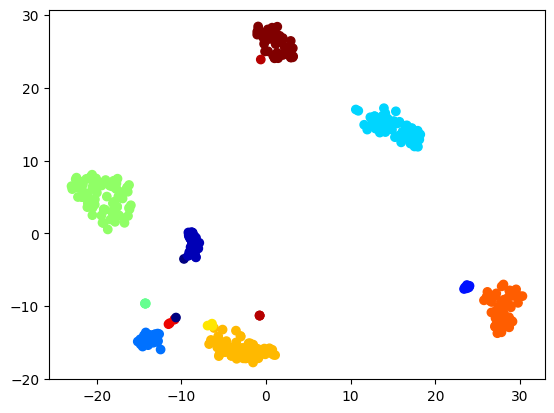

In [10]:
ana_nosamp.fit_tsne(name='tsne', random_state=42)
fig, ax = ana_nosamp.plot_embedding('tsne')
plt.show()

### Save Unsampled Analyzer

In [7]:
print(ana_nosamp)

Models:


Clusters:
kmeans: KMeans(init='random', n_clusters=2, n_init=100, random_state=42)
gmm: GaussianMixture(n_components=2, random_state=42)
dbscan: DBSCAN(eps=0.09999999999999999, min_samples=14, n_jobs=-1)


Embeddings:
tsne: TSNE(random_state=42)



In [11]:
save_dir = '../models/part_1_hymns/'
with open(save_dir + 'analyzer_sig-mode_notrans_nosamp.pkl', 'wb') as f:
    pickle.dump(ana_nosamp, f)